In [1]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# open the HDF5 file
f = h5py.File("k_1_n_18_60-00227.h5")

# read the axes and the current simulation time
r = f['/00001/x'][:] * 1e16
theta = f['/00001/y'][:]
t = (f['/00001/time'][:][0] + 1.206045378) * 1e16 / 2.99792458e10 / 86400 # convert time to days

# read the hydro data and convert to cgs units
rho = f['/00001/densty'][0, :] * 1.67262158e-24
P = f['/00001/pres'][0, :] * 1.67262158e-24 * (2.99792458e10)**2

# read the velocities and leave them as betas
betar = f['/00001/velx'][0, :]
betatheta = f['/00001/vely'][0, :]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


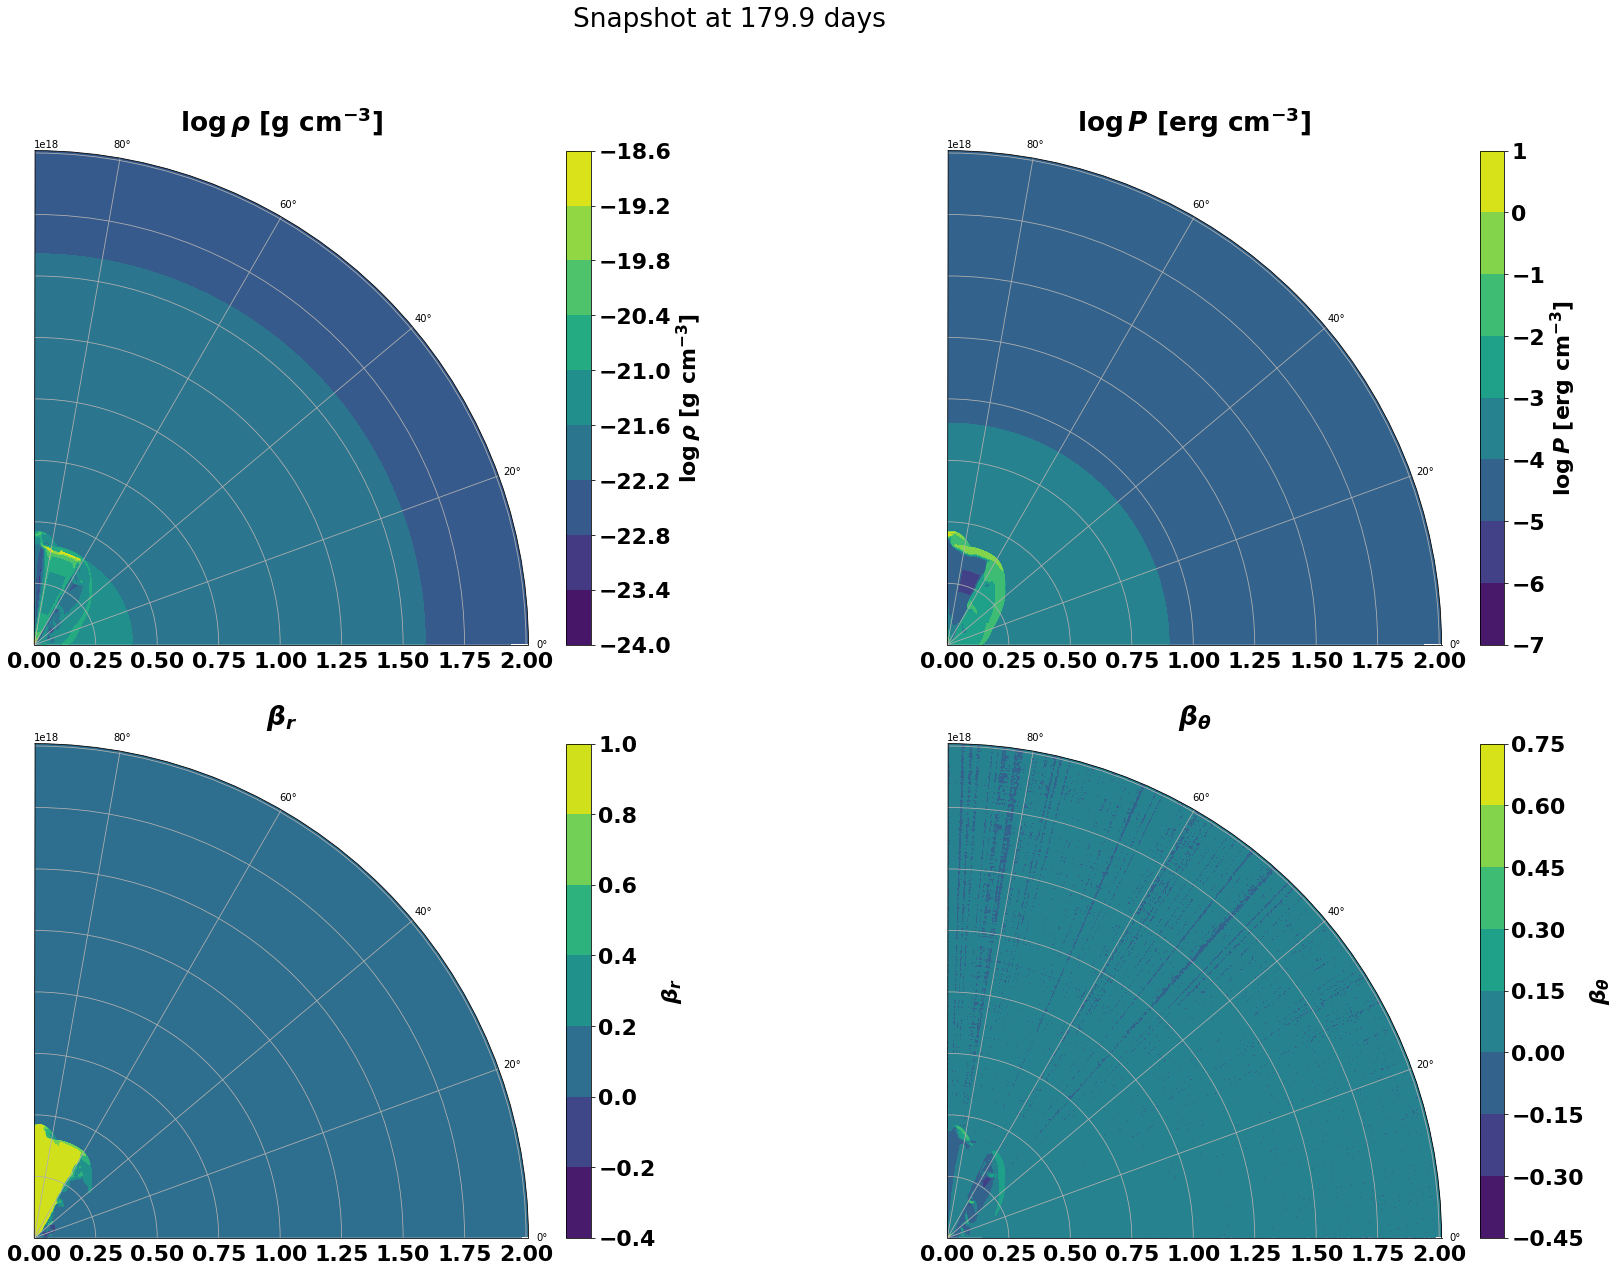

In [3]:
# create a polar coordinates grid
plot_r, plot_theta = np.meshgrid(r, np.pi / 2 - theta)

# define the variables that will be plotted in each panel
plot_panels = {'rho': np.log10(rho), 'P': np.log10(P), 'betar': betar, 'betatheta': betatheta}
plot_panel_names = {'rho': r'$\log \rho\ [{\rm g\ cm}^{-3}]$', 'P': r'$\log P\ [{\rm erg\ cm}^{-3}]$', 'betar': r'$\beta_r$', 'betatheta': r'$\beta_\theta$'}
panel_names = list(plot_panels.keys())

# create the plot grid
fig, ax = plt.subplots(2, 2, subplot_kw=dict(projection='polar'), figsize = (30, 20))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# plot each variable
for cur_row in range(2):
    for cur_col in range(2):
        panel_name = panel_names[cur_row * 2 + cur_col]
        cur_ax = ax[cur_row][cur_col]
        
        # plot values
        cur_plot = cur_ax.contourf(plot_theta, plot_r, plot_panels[panel_name])
        
        # show colour bar
        cur_cbar = plt.colorbar(cur_plot, ax=cur_ax)
        cur_cbar.ax.set_ylabel(plot_panel_names[panel_name])
        
        # set axis limits
        cur_ax.set_ylim(0, r[-1])
        cur_ax.set_xlim(0, theta[-1])
        
        # set panel title
        cur_ax.set_title(plot_panel_names[panel_name])
        

fig.suptitle("Snapshot at {:.1f} days".format(t))
plt.show()